# Демодуляция ЧМ-сигналов
# Phase Locked Loop Detector

## 1. Phase Locked Loop Detector

Наиболее качественный прием FM-сигналов с точки зрения помехоустойчивости обеспечивает демодулятор на основе фазовой автоподстройки частоты (phase locked loop - PLL). PLL отслеживает мгновенную частоту сигнал, которая при частотной модуляции задается информационным сообщением. Данный приемник также называют когерентным. Его схема представлена ниже:

<img src="../../images/demodulation_pll_detector_1.png" width=500/>

Классическая PLL состоит из трех основных блоков: фазового детектора (phase detector - PD), петлевого фильтра (loop filter - LF) и генератора, управляемого напряжением (numericaly controled oscillator - NCO). Фазовый детектор вычисляет разность фаз между несущей и NCO. Схема PLL представлена ниже:

<img src="../../images/demodulation_pll_detector_2.png" width=500/>

Фазовый детектор можно реализовать с помощью обычного умножителя. Будем считать, что несущую можно представить в виде:

$$u_c =A\cdot \sin \left(\omega_с t+\phi_0 \right)=A\cdot \sin \left(\Phi_с \left(t\right)\right).$$

Также пусть мгновенная фаза несущей в момент времени $t_0$ равна $\Phi_с \left(t_0 \right)$ рад., а фаза NCO - $\Phi_{\textrm{NCO}} \left(t_0 \right)=\Phi_с \left(t_0 \right)-\Delta$рад. Тогда получаем:

$$A\cdot \sin \left(\Phi_с \left(t_0 \right)\right)\cdot \cos \left(\Phi_{\textrm{NCO}} \left(t_0 \right)\right)=A\cdot \sin \left(\Phi_с \left(t_0 \right)\right)\cdot \cos \left(\Phi_с \left(t_0 \right)-\Delta \right)=A\cdot 0\ldotp 5\cdot \sin \left(\Delta \right)+A\cdot 0\ldotp 5\cdot \sin \left(2\Phi_c \left(t_0 \right)-\Delta \right).$$


Слагаемое с удвоенной частотой можно убрать с помощью низкочастотного фильтра. Если этого не сделать, то оно в любом случае в дальнейшем будет удалено с помощью петлевого фильтра. Поэтому данным слагаемым можно пренебречь. То есть, отклик фазового детектора можно считать равным $A\cdot 0\ldotp 5\cdot \sin \left(\Delta \right)$. В случае, когда PLL находится в режиме синхронизации, расстройка по фазе будет близка к нулю, а значит $\sin \left(\Delta \right)\simeq \Delta \ldotp$ Таким образом, сигнал на выходе детектора будет приближенно равен $A\cdot 0\ldotp 5\cdot \Delta$. Величину $k_d =A\cdot 0\ldotp 5$ называют коэффициентом усиления детектора. Обратите внимание, что она зависит от амплитуды несущей.

Сигнал с выхода фазового детектора передается на вход петлевого фильтра, который удаляет шумы, присутствующий в сигнале, а также задает динамические характеристики PLL. Обычно фильтр реализуется в виде пропорциональной и интегрирующей ветвей, коэффициенты усиления которых равны $k_p$ и $k_i$ соответственно. Схема фильтра представлена ниже:

<img src="../../images/demodulation_pll_detector_3.png" width=500/>

Эти коэффициенты рассчитываются на основе других характеристик PLL, а именно коэффициента демпфирования и шумовой полосы. Коэффициент демпфирования определяет степень осциляций при вхождении PLL в режим синхронизации. Шумовая полоса характеризует, как сильно будет ослаблятся шум на выходе PLL. Чем меньше полоса - тем меньше шума. Однако, уменьшение шумовой полосы приводит к существенному увеличению времени вхождения в режим синхронизации и уменьшает полосу захвата PLL. Формулы для расчета коэффициентов фильтра представлены ниже:

$$k_p =\frac{4\cdot \zeta \cdot B_n }{k_d \cdot \left(\zeta +\frac{1}{4\cdot \zeta }\right)},$    $k_i =\frac{4\cdot {B_n }^2 }{k_d \cdot {\left(\zeta +\frac{1}{4\cdot \zeta }\right)}^2 },$$

где $\zeta$ - коэффициент демпфирования, $B_n$ = $B\cdot f_s$ - нормированная шумовая полоса, $B$- шумовая полоса в герцах, $f_s$ - частота дискретизации в герцах.

Сигнал с выхода петлевого фильтра изменяет частоту управляемого генератора и тем самым подстраивает его фазу для уменьшения ошибки $\Delta$. Значание фазы NCO в аналитическом виде можно записать так:

$$\Phi_{\textrm{NCO}} \left(t\right)=\int_{-\infty }^t \left(\omega_0 +u_f \left(\tau \right)\right)d\tau ,$$

где $\omega_0$ - частота NCO при отсутствии входнго воздействия, $u_f \left(t\right)$ - сигнал на выходе петлевого фильтра. Таким образом, управляемый генератор по сути представляет из себя интегратор. При синхронизации значение сигнала на входе управляемого генератора будет совпадать с мгновенной частотой принимаемого сигнала. То есть, значение $u_f \left(t\right)$ будет совпадать с информационным сообщением $m\left(t\right)$.

Рассмотрим как изменится структура фазовой автоподстройки частоты, если сигнал принимается квадратурным способом. Сигнал теперь комплексный с односторонним спектром. Отличае от случая действительнго сигнала заключается в устройстве фазового детектора. При квадратурном приеме несущую можно представить в виде комплексной экспоненты ${A\cdot e}^{j\cdot \Phi_с \left(t\right)}$. Выходной сигнал NCO также будет комплексным - $e^{-j\cdot \Phi_{\textrm{NCO}} \left(t\right)}$. Как и ранее через $\Phi_с \left(t\right)$ и $\Phi_{\textrm{NCO}} \left(t\right)=\Phi_с \left(t\right)-\Delta$ обозначены мгновенные фазы несущей и NCO. Фазовый детектор представляет из себя умножитель, после которого располается блок вычисления аргумента комплексного числа. Это можно записать в аналитическом виде:

$${s_{\textrm{mix}} =A\cdot e}^{j\cdot \Phi_с \left(t\right)} \cdot e^{-j\cdot \Phi_{\textrm{NCO}} \left(t\right)} ={A\cdot e}^{j\cdot \left\lbrack \Phi_с \left(t\right)-\Phi_с \left(t\right)+\Delta \right\rbrack } ={A\cdot e}^{j\cdot \Delta } ,$$

$$s_d =\arg \left\lbrace s_{\textrm{mix}} \right\rbrace =\arg \left\lbrace {A\cdot e}^{j\cdot \Delta } \right\rbrace =\Delta ,$$

где $s_{\textrm{mix}}$ - сигнал на выходе умножителя, а $s_d$- сигнал на выход фазового детектора.

Можно увидеть, что в случае квадратурного приема сигнал на выходе фазового детектора не зависит от амплитуды несущей, а коэффициент усиления детектора $k_d$ равен единице. Остальная часть PLL полностью совпадает с реализацией для действительного принимаемого сигнала.


## 2. Демодуляция аудиосообщения

Рассмотрим демодуляцию аудиосообщения с помощью скрипта, реализующего PLL Detector.

В файлах Audio\_FM\_ModIdx\_*.wav записаны частотно-модулированные сигналы с различными индексами модуляции. Частота несущей $f_s$ равна 100 kHz, а частота дискретизации $f_s$ = $441$ kHz. Считаем, что прием выполняется квадратурным способ, то есть сигнал имеет вид:

$$s\left(t\right)=A_с \cdot \exp^{j\cdot \left(2\pi f_с t+2\pi K_f \cdot \int_{-\infty }^t m\left(\tau \right)\cdot d\tau \right)} \ldotp$$

Чтобы PLL успевала следить за информационным сообщением $m\left(t\right)\;$, ее полоса пропускания должная быть больше полосы сообщения. Будем считать, что сообщение  имеет полосу 20 kHz. Полосу PLL по уровню 3 dB возьмем с запасом, равной 40 kHz. Коэффициент демпфтирования пусть будет равен $1/\sqrt{2}$.

Рассчитаем шумовую полосу PLL. Для этого сначала найдем резонансную частоту контура PLL с помощью уравнения:

$$f_R =\frac{f_B }{\sqrt{1+2\cdot \zeta^2 +\sqrt{{\left(2\cdot \zeta^2 +1\right)}^2 +1}}},$$

где $f_R$ - резонансная частотая контура в Hz, $f_B$ - полоса пропускания контура по уровню 3 dB в Hz, $\zeta$ - коэффициент демпфирования.

Зная резонансную частоту, можем посчитать шумовую полосу PLL по слудующей формуле:

$$B=\frac{2\pi \cdot f_R \cdot \left(\zeta +\frac{1}{4\zeta }\right)}{2},$$

где $B$ - шумовая полоса в Hz. В нашем примере шумовая полоса будет равна 64 kHz.

Для квадратурной фазовой автоподстройки частоты был создан Matlab System Object, описание которого находится в файле ComplexPLL.m. Данный System Object в качестве параметров принимает частоту дискретизации, коэффициент демпфирования, шумовую полосу и частоту NCO при отсутствии входного воздействия. На выходы System Object выдается сигналы на выходов петлевого фильтра и NCO.

Сигнал с выхода фильтра подается на дециматор. После децимации и удаления постоянной составлющей получаем информационное сообщение.


<IPython.core.display.Javascript object>


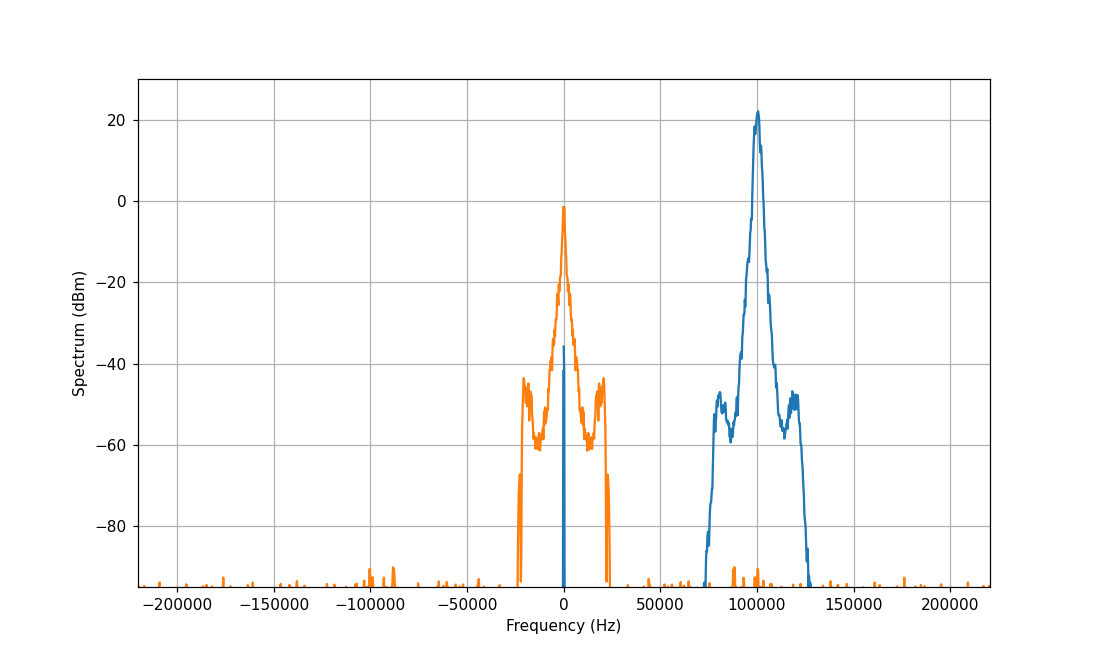

In [1]:
%matplotlib notebook
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import wave, sounddevice

from complex_pll import Complex_pll
from scipy.signal import welch, resample_poly

signal_frame_size = 10000  # количество отсчетов аудиофайла, получаемых за один раз
frames_number = 500        # число обрабатываемых пачек данных
rate_ratio = 10            # коэффициент увеличения частоты дискретизации
audio_amp = 0.2              # коэффициент усиления аудиосигнала
mod_index = '02'           # индекс модуляции ('02' = 0.2, '06' = 0.6, '1' = 1)

# открываем файл и получаем частоту дискретизации
signal_file = wave.open(f'../../wav/Audio_FM_ModIdx_{mod_index}.wav')
signal_fs = signal_file.getframerate()

# частота дискретизации и размер кадра после передискретизации
audio_fs = signal_fs / rate_ratio
audio_frame_size = signal_frame_size / rate_ratio

# построение осей графиков
plt.rcParams['figure.figsize'] = [10, 6]
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectrum (dBm)')
ax.set_xlim(-signal_fs/2, signal_fs/2)
ax.set_ylim(-95, 30)
ax.grid(True)

# создаем три линии для будущих графиков
for _ in range(2):
    ax.plot(np.arange(signal_frame_size), np.zeros(signal_frame_size))

# расчет параметров PLL
nco_amp = 1 / 20e3          # коэффициент усиления сигнала с выхода NCO
pll_bandwidth_3dB = 40e3    # полоса пропускания PLL по уровню 3 dB
damping_factor = 0.7        # декремент затухания PLL

resonance_frequency = pll_bandwidth_3dB / np.sqrt(1 + 2*damping_factor**2 + np.sqrt((2*damping_factor**2 + 1)**2 + 1))
noise_bandwidth = resonance_frequency * (2*np.pi) * (damping_factor + 0.25/damping_factor) / 2
    
# создаем объект PLL
pll = Complex_pll(
    sample_frequency = signal_fs,
    noise_bandwidth = noise_bandwidth,
    damping_factor = damping_factor,
    central_frequency = 100e3
    )

message = []

t = np.linspace(0, signal_frame_size/signal_fs, signal_frame_size) 

for frame in range(frames_number):

    # формирование отсчетов аудиосигнала
    fm_signal = signal_file.readframes(signal_frame_size)      # считываем отсчеты
    fm_signal = np.frombuffer(fm_signal, dtype=np.int16)       # преобразуем тип данных из byte в int16
    fm_signal = np.reshape(fm_signal, (-1, 2))                 # разделяем отсчеты для правого и левого канала
    fm_signal = (fm_signal[:,0] + 1j*fm_signal[:,1]) / 2**15   # выделяем комплексный сигнал и нормируем отсчеты к единице
    
    # удаление постоянной составляющей
    fm_signal = fm_signal - fm_signal.mean()
 
    # частотная демодуляция с помощью PLL
    nco_output, _ = pll.step(fm_signal)

    # нормирование выхода NCO
    nco_output = nco_output * nco_amp
    
    # построение спектрограмм
    signals = fm_signal, nco_output
    
    for i in range(2):
        f, spectrum = welch(signals[i], signal_fs, return_onesided=False, scaling='spectrum', nperseg=2048) # вычисление спектров
        spectrum_dBm = 10*np.log10(spectrum) + 30                                                    # перевод значений в dBm
        ax.lines[i].set_xdata(f)
        ax.lines[i].set_ydata(spectrum_dBm)
    
    # отрисовка графиков
    fig.canvas.draw() 
    
    # удаление постоянной составляющей и уменьшение частоты дискретизации
    baseband_signal = nco_output - nco_output.mean()
    audio_data = resample_poly(baseband_signal, 1, rate_ratio)
    message = np.concatenate((message, audio_data))
    
    # обновляем отсчеты времени
    t = t + signal_frame_size/signal_fs 

sounddevice.play(message * audio_amp, audio_fs, blocking=True)

На спектрограмме желтым показан спектр частотно-модулированного сигнала, а синим - спектр восстановленного сообщения. На слух можно оценить, что сообщение восстанавливается без искажений.

## Литература:
- B. P. Lathi Modern Digital and Analog Communication Systems 
- R. Stewart, K. Barlee, D. Atkinson, L. Crockett Software Defined Radio using MATLAB® & Simulink and the RTL-SDR